In [4]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:

with open("../models/model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("../models/vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

print("Logistic Regression model loaded successfully!")


Logistic Regression model loaded successfully!


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../datasets/fake reviews dataset.csv")

X_train, X_test, y_train, y_test = train_test_split(df["text_"], df["label"], test_size=0.2, random_state=42)


In [8]:
def preprocess_text(text):
    return vectorizer.transform([text])  # Convert text to numerical representation


In [9]:
def predict_review(text):
    vectorized_text = preprocess_text(text)
    prediction = model.predict(vectorized_text)
    return "Fake Review" if prediction[0] == 1 else "Real Review"


In [10]:
sample_reviews = [
    "This product is amazing! Best purchase ever!",
    "Worst product. Don't waste your money.",
    "I received a free product in exchange for a good review. Highly recommended!"
]

for review in sample_reviews:
    print(f"Review: {review}")
    print(f"Prediction: {predict_review(review)}")
    print("-" * 80)


Review: This product is amazing! Best purchase ever!
Prediction: Real Review
--------------------------------------------------------------------------------
Review: Worst product. Don't waste your money.
Prediction: Real Review
--------------------------------------------------------------------------------
Review: I received a free product in exchange for a good review. Highly recommended!
Prediction: Real Review
--------------------------------------------------------------------------------


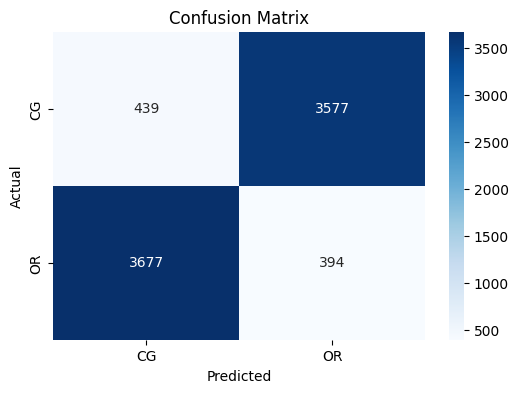

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode the true labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict the labels for the test set
y_pred = model.predict(vectorizer.transform(X_test))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
#user input
user_input = input("Enter the review: ")
print(f"Prediction: {predict_review(user_input)}")

Prediction: Fake Review
